In [ ]:
# Importing library

In [197]:
import os
import librosa
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [198]:
#Preprocessing

In [199]:
def extract_mfcc(audio_path, max_pad_len=100):
    audio, sr = librosa.load(audio_path, mono=True)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfccs

def load_data(data_dir):
    labels = []
    mfccs = []
    for label, folder in enumerate(os.listdir(data_dir)):
        for filename in os.listdir(os.path.join(data_dir, folder)):
            if filename.endswith(".wav"):
                audio_path = os.path.join(data_dir, folder, filename)
                mfcc = extract_mfcc(audio_path)
                mfccs.append(mfcc)
                labels.append(label)
    return np.array(mfccs), np.array(labels)

In [200]:
data_dir = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data"

In [201]:
#Load Data

In [202]:
X, y = load_data(data_dir)

In [203]:
#Split and Encode data

In [204]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
#Display Audio

In [206]:
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Audio
data = tf.keras.utils.audio_dataset_from_directory('D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
for idx, audio in enumerate(batch[0][:20]):
    display(Audio(audio.astype(int), rate=16000)) 

plt.show()

Found 5188 files belonging to 3 classes.


D:\Anconda\lib\site-packages\IPython\lib\display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767
D:\Anconda\lib\site-packages\IPython\lib\display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


In [207]:
#Build Neaural Network

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling1D, Flatten, Dense, BatchNormalization

model = Sequential()
input_shape = (X.shape[1], X.shape[2], 1) 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=np.max(y) + 1, activation='softmax'))


In [209]:
#RUN Nuetwork

In [210]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [211]:
#Trainig model

In [212]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=11, batch_size=64)

Epoch 1/11
65/65 [==============================] - 8s 110ms/step - loss: 0.6212 - accuracy: 0.7508 - val_loss: 0.4291 - val_accuracy: 0.8314
Epoch 2/11
65/65 [==============================] - 7s 100ms/step - loss: 0.2170 - accuracy: 0.9236 - val_loss: 0.3314 - val_accuracy: 0.8699
Epoch 3/11
65/65 [==============================] - 7s 110ms/step - loss: 0.1145 - accuracy: 0.9581 - val_loss: 0.2331 - val_accuracy: 0.9200
Epoch 4/11
65/65 [==============================] - 8s 119ms/step - loss: 0.0723 - accuracy: 0.9757 - val_loss: 0.1874 - val_accuracy: 0.9277
Epoch 5/11
65/65 [==============================] - 7s 107ms/step - loss: 0.0462 - accuracy: 0.9851 - val_loss: 0.1592 - val_accuracy: 0.9441
Epoch 6/11
65/65 [==============================] - 7s 104ms/step - loss: 0.0384 - accuracy: 0.9860 - val_loss: 0.1032 - val_accuracy: 0.9605
Epoch 7/11
65/65 [==============================] - 7s 102ms/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 0.1118 - val_accuracy: 0.9624
Epoch 

In [213]:
#Evaluting model

In [214]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy*100:.2f}%")

33/33 [==============================] - 1s 15ms/step - loss: 0.0523 - accuracy: 0.9827
Test accuracy: 98.27%


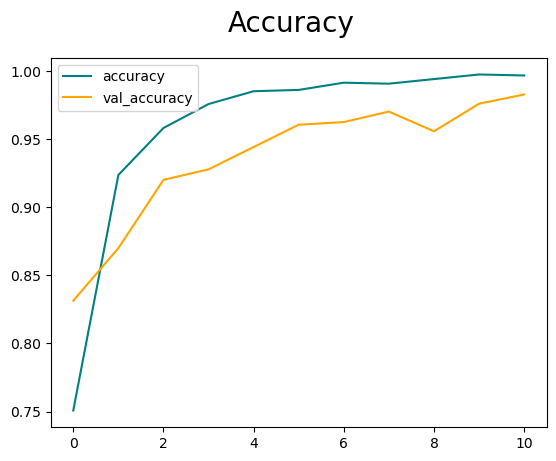

In [215]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

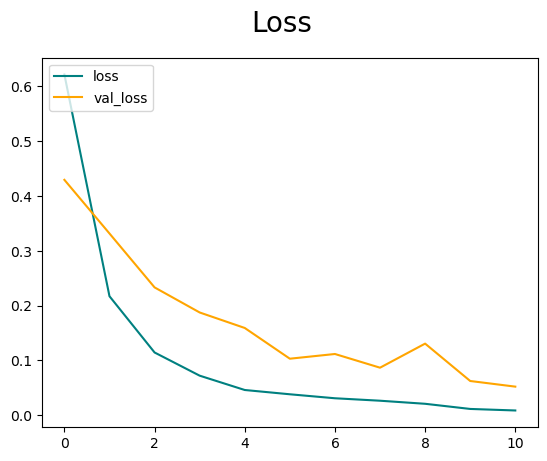

In [216]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [220]:
file_path = "D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\Audio\\data\\bed\\ffd2ba2f_nohash_0.wav"
test_mfcc = extract_mfcc(file_path)
test_mfcc = np.expand_dims(test_mfcc, axis=0) 
predicted_class = np.argmax(model.predict(test_mfcc))
class_labels = ['bed', 'cat', 'happy']
predicted_label = class_labels[predicted_class]

print(f"The predicted class is: {predicted_label}")

1/1 [==============================] - 0s 26ms/step
The predicted class is: bed


In [221]:
model.save('audio.model')

INFO:tensorflow:Assets written to: audio.model\assets


INFO:tensorflow:Assets written to: audio.model\assets
